In [581]:
import pandas as pd
import matplotlib.pyplot as plt
import csv 
from collections import defaultdict

In [582]:
products_num = defaultdict(int)

spChar = ['`','~','!','@','#','$','^','&','*','(',')','_','+','=','{','[','}','}','|',':',';','<',',','>','.','?','/', '\\']
spChar2 = ['"', "'", '%', '-']

error = True

with open("Text1.csv", encoding='utf-8') as r_file:
    file_reader = csv.reader(r_file, delimiter = "|")

    massiv = list(file_reader)
    
    for row in file_reader:
        num = int(row[4])
        name = row[2]

        products_num[name] += num   

    summa = 0

    for row in massiv:
        if row != massiv[0]:
            summa += int(row[6])

            #Общий формат файла
            if (len(row) != 7):
                print("Файл неправильно отформатирован")
                print(row)
                error = False
                break
            #Номер заказа
            try:
                int(row[0])
            except:
                print("Номер заказа не совпадает с форматом шаблона")
                print(row[0])
                error = False
                break
            #Дата заказа
            try:
                str(row[1])
            except:
                print("Дата заказа указана неверно")
                print(row[1])
                error = False
                break
            #Название товара
            if any((char in spChar) for char in row[2]):
                print("Название товара указана неверно")
                print(row[2])
                error = False
                break
            #Категория товара
            if any((char in spChar) for char in row[3]) or any((char in spChar2) for char in row[3]) or any((char.isdigit()) for char in row[3]):
                print("Категория товара указана неверно")
                print(row[3])
                error = False
                break
            #Количество продаж
            try:
                int(row[4])
            except:
                print("Количество продаж указано неверно")
                print(row[4])
                error = False
                break
            #Цена за единицу
            try:
                float(row[5])
            except:
                print("Цена единицы товара указана неверно")
                print(row[5])
                error = False
                break
            #Общая стоимость
            try:
                float(row[6])
            except:
                print("Общая стоимость товаров указана неверно")
                print(row[6])
                error = False
                break
            if ((int(row[4]) * float(row[5])) != float(row[6])):
                print("Общая стоимость товара не совпадает с произвоизведением цены за товар и количества товаров")
                print(int(row[4]) * float(row[5]))
                print(float(row[6]))
                print(row)
                error = False
                break

with open("Text1.csv", encoding='utf-8') as r_file:
    file_reader = csv.reader(r_file, delimiter = "|")
    next(file_reader)

    for row in file_reader:
        num = int(row[4])
        name = row[2]

        products_num[name] += num   

In [583]:
def quicksort(array):
    num = len(array)
    if num <= 1:
        return array
    pivot = array[num // 2][0]
    left = []
    middle = []
    right = []
    for info in array:
        if info[0] < pivot:
            left.append(info)
        elif info[0] > pivot:
            right.append(info)
        else:
            middle.append(info)
    return quicksort(left) + middle + quicksort(right)


In [584]:
hashTable = [None] * (len(massiv) - 1)
for i in range(len(hashTable)):
    hashTable[i] = []

def hash(key):
        keykey = 0
        for i in key:
            keykey += ord(i)
        return int(keykey) % (len(massiv) - 1)

def insert(key, value):
        i = hash(key)   
        hashTable[i].append(value)

for row in massiv:
        if (row != massiv[0]):
            insert(row[2], row[2])
            
for i in hashTable:
        print(i)

['Чай Золотая Чаша']
['Картофельные чипсы']
['Творог']
['Пепси']
['Сыр']
['Апельсины']
['Хрен']
['Орехи']
['Ананас']
['Мармелад']
['Анчоусы']
['Кукуруза Бандюэль']
['Жареная курица']
['Сырный лаваш']
['Копченая колбаса']


In [585]:
def calculation(r_file):
    max_tovar, obh_stoimost = 0,0 # общая выручка, переменная для максимального количества проданного товара, общая стоимость продаж товара
    max_viruchca = "" #Товар, который принес максимальную выручку
      
    max_sales = "" # товар проданный максимальное количесво раз
    count_row = 0 # количество строк в csv файле
    
    for row in r_file:
        if count_row != 0:              
            if max_tovar < int(row[4]): #товар, который был продан максимальное количество раз
                max_tovar = int(row[4]) 
                max_sales = row[2] 
            if obh_stoimost < int(row[6]):
                obh_stoimost = int(row[6])
                max_viruchca = row[2]
        count_row += 1
    
    return max_sales, max_viruchca

In [586]:
try:

    data = pd.read_csv('Text1.csv', sep='|')
    with open("Text1.csv", encoding='utf-8') as r_file:
        file_reader = csv.reader(r_file, delimiter = "|")

        for row in massiv:
            if row != massiv[0]:
                print(f'{row[2]} был(а) продан(а) {row[4]} раз(а) и занимает(ют) {(int(row[6])*100)/summa} % от общей выручки')
                print()

        print(f'Общая выручка магазина: {summa}')
        
        max_sales, max_viruchca = calculation(file_reader)   
        print(f'Товар, который был продан наибольшее количество раз: {max_sales}')
        print(f'Товар, который принес наибольшую выручку: {max_viruchca}')

        massiv = list(file_reader)  

    products_num_list = [(value, key) for key, value in products_num.items()]

    products_num_list = quicksort(products_num_list)

    print("Наиболее часто покупаемый продукт:", products_num_list[-1])

except:
    print('В файле содержатся ошибки')

Пепси был(а) продан(а) 6 раз(а) и занимает(ют) 2.444987775061125 % от общей выручки

Апельсины был(а) продан(а) 3 раз(а) и занимает(ют) 4.88997555012225 % от общей выручки

Жареная курица был(а) продан(а) 2 раз(а) и занимает(ют) 3.2599837000814995 % от общей выручки

Мармелад был(а) продан(а) 4 раз(а) и занимает(ют) 6.519967400162999 % от общей выручки

Картофельные чипсы был(а) продан(а) 5 раз(а) и занимает(ют) 8.149959250203748 % от общей выручки

Копченая колбаса был(а) продан(а) 8 раз(а) и занимает(ют) 5.8679706601467 % от общей выручки

Чай Золотая Чаша был(а) продан(а) 20 раз(а) и занимает(ют) 3.2599837000814995 % от общей выручки

Анчоусы был(а) продан(а) 1 раз(а) и занимает(ют) 1.6299918500407498 % от общей выручки

Ананас был(а) продан(а) 7 раз(а) и занимает(ют) 11.409942950285249 % от общей выручки

Хрен был(а) продан(а) 7 раз(а) и занимает(ют) 1.1409942950285248 % от общей выручки

Сыр был(а) продан(а) 7 раз(а) и занимает(ют) 0.5704971475142624 % от общей выручки

Творог был

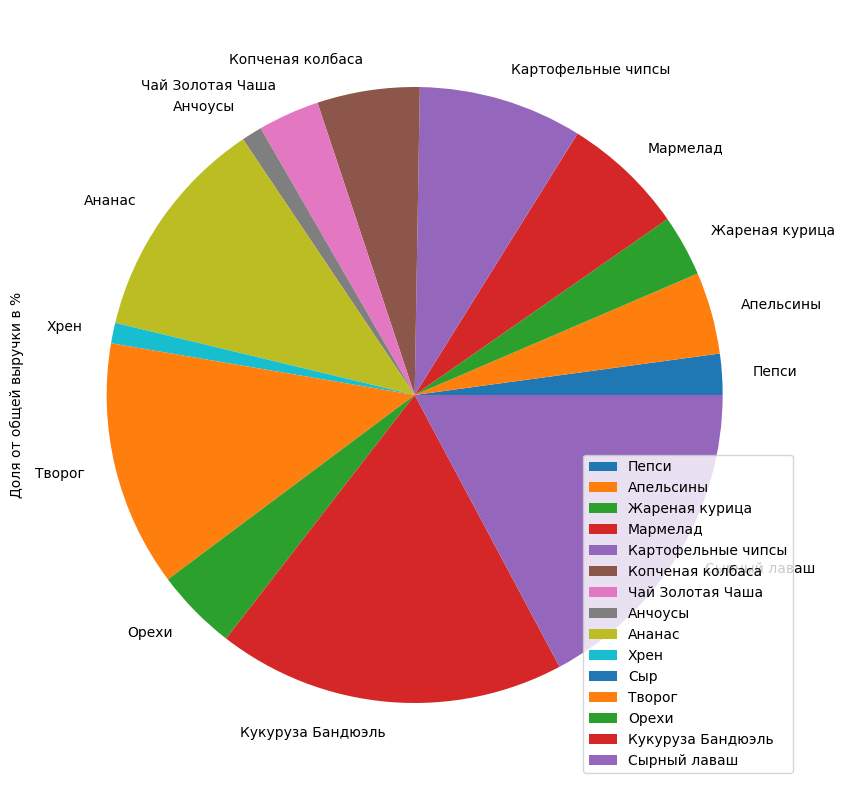

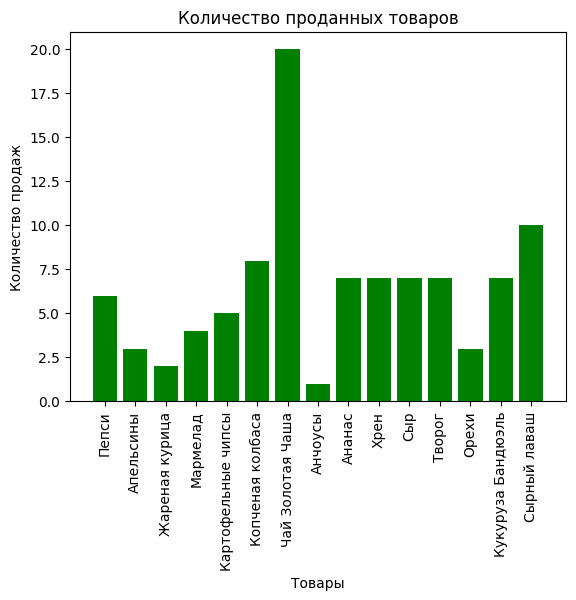

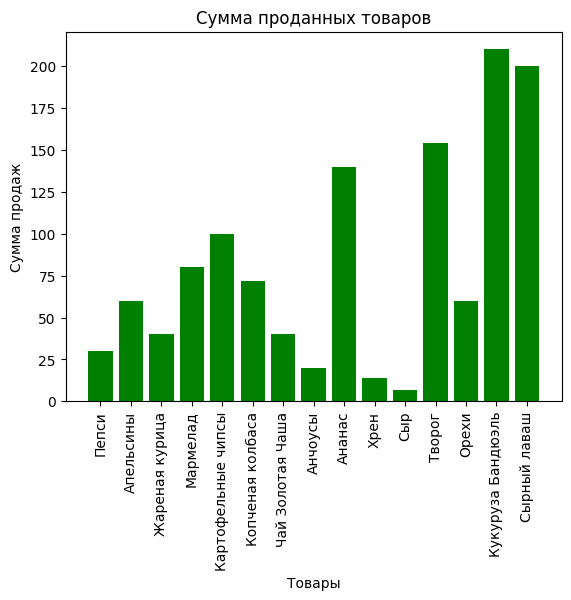

In [587]:
data['Доля от общей выручки в %'] = data['Общая стоимость'] / (summa / 100)
data['Доля от общей выручки в %'] = data['Доля от общей выручки в %'].round(2).astype(int)
data.index = data['Название товара']

data[['Количество продаж', 'Общая стоимость', 'Доля от общей выручки в %']]

data.plot(y = 'Доля от общей выручки в %', kind = 'pie', figsize=(10,10))
plt.show()

df = pd.DataFrame(data) 
  
X = list(df.iloc[:, 2]) 
Y = list(df.iloc[:, 4]) 
  
plt.bar(X, Y, color='g') 
plt.title("Количество проданных товаров") 
plt.xlabel("Товары") 
plt.ylabel("Количество продаж") 
plt.xticks(rotation='vertical')
  
plt.show() 

df = pd.DataFrame(data) 
  
X = list(df.iloc[:, 2]) 
Y = list(df.iloc[:, 6]) 
  
plt.bar(X, Y, color='g') 
plt.title("Сумма проданных товаров") 
plt.xlabel("Товары") 
plt.ylabel("Сумма продаж") 
plt.xticks(rotation='vertical')
  
plt.show() 